In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

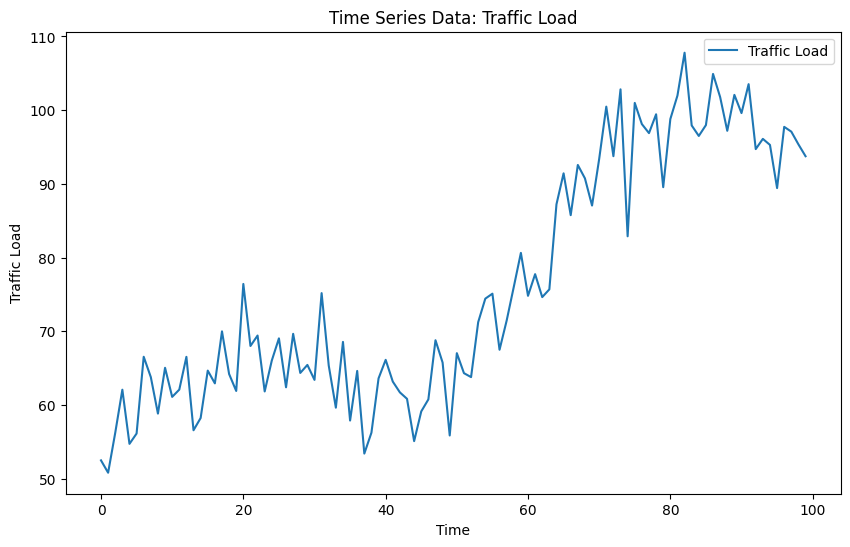

In [2]:
# Step 1: Generate synthetic time series data
np.random.seed(42)
num_timesteps = 100
time = np.arange(num_timesteps)
traffic_load = 50 + 0.5 * time + 10 * np.sin(0.1 * time) + np.random.normal(0, 5, num_timesteps)

# Create a DataFrame
df = pd.DataFrame({
    "time": time,
    "traffic_load": traffic_load
})

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df["time"], df["traffic_load"], label="Traffic Load")
plt.title("Time Series Data: Traffic Load")
plt.xlabel("Time")
plt.ylabel("Traffic Load")
plt.legend()
plt.show()

In [3]:
# Step 2: Split the data into training and testing sets
train_size = int(0.8 * num_timesteps)
train, test = df["traffic_load"][:train_size], df["traffic_load"][train_size:]

In [4]:
# Step 3: Fit an ARIMA model
# ARIMA(p, d, q):
# p = order of the autoregressive part (AR)
# d = degree of differencing (I)
# q = order of the moving average part (MA)
model = ARIMA(train, order=(5, 1, 0))  # Example: ARIMA(5, 1, 0)
model_fit = model.fit()

In [5]:
# Step 4: Make predictions
predictions = model_fit.forecast(steps=len(test))


In [6]:
# Step 5: Evaluate the model
mse = mean_squared_error(test, predictions)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 26.830855150537808


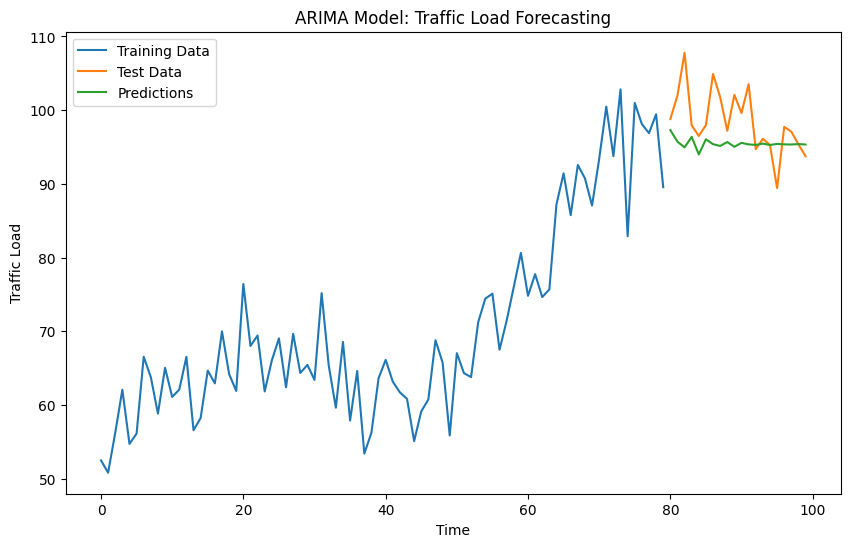

In [7]:
# Step 6: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df["time"][:train_size], train, label="Training Data")
plt.plot(df["time"][train_size:], test, label="Test Data")
plt.plot(df["time"][train_size:], predictions, label="Predictions")
plt.title("ARIMA Model: Traffic Load Forecasting")
plt.xlabel("Time")
plt.ylabel("Traffic Load")
plt.legend()
plt.show()